# 机器学习工程师纳米学位
## 非监督式学习
## 项目：创建客户细分

欢迎来到机器学习工程师纳米学位的第三个实战项目！在此 notebook 中，我们已经为你提供了一些模板代码，你需要实现其他必要功能，以便成功地完成此项目。以**实现**开头的部分表示你必须为下面的代码块提供额外的功能。我们将在每部分提供说明，并在代码块中用 `'TODO'` 语句标记具体的实现要求。请务必仔细阅读说明！

除了实现代码之外，你必须回答一些问题，这些问题与项目和你的实现有关。每个部分需要回答的问题都在开头以**问题 X** 标记。请仔细阅读每个问题并在下面以**答案：**开头的文本框中提供详细的答案。我们将根据你的每个问题答案和所提供的实现代码评估你提交的项目。

>**注意：**你可以使用键盘快捷键 **Shift + Enter** 执行代码和 Markdown 单元格。此外，可以通过双击进入编辑模式，编辑 Markdown 单元格。

## 开始

在此项目中，你将分析一个数据集，该数据集包含关于来自多种产品类别的各种客户年度消费额（*货币单位*计价）的数据。该项目的目标之一是准确地描述与批发商进行交易的不同类型的客户之间的差别。这样可以使分销商清晰地了解如何安排送货服务，以便满足每位客户的需求。

你可以在 [UCI 机器学习代码库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到此项目的数据集。对于此项目，我们将忽略特征 `'Channel'` 和 `'Region'`，重点分析记录的六个客户产品类别。

运行以下代码块，以加载批发客户数据集以及几个此项目所需的必要 Python 库。你可以根据系统报告的数据集大小判断数据集是否已成功加载。

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## 数据探索
在此部分，你将通过可视化图表和代码开始探索数据，并了解每个特征相互之间的关系。你将观察数据集的统计学描述内容，考虑每个特征之间的联系，从数据集中选择几个样本数据集并在整个项目期间跟踪这几个样本。

运行以下代码块，以观察数据集的统计学描述内容。注意数据集由  6 个重要的产品类别构成：**“Fresh”**、**“Milk”**、**“Grocery”**、**“Frozen”**、**“Detergents_Paper”**和**“Delicatessen”**。思考每个类别代表你可以购买的哪些产品。

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 实现：选择样本
为了更好地通过分析了解客户以及他们的数据会如何变化，最好的方式是选择几个样本数据点并更详细地分析这些数据点。在以下代码块中，向 `indices` 列表中添加**三个**你所选的索引，表示将跟踪的客户。建议尝试不同的样本集合，直到获得相互之间差异很大的客户。

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [100, 200, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


### 问题 1
查看样本客户对应的每个产品类别的总购买成本和上述统计学描述内容。  

* 你所选的每个样本可以代表什么样的（客户）场所？

**提示：**场所示例包括市场、咖啡厅、熟食店、零售店等地点。避免使用具体的名称，例如在将样本客户描述为餐厅时使用“麦当劳”。你可以使用参考均值与你的样本进行比较。均值如下所示：

* Fresh：12000.2977
* Milk：5796.2
* Grocery：3071.9
* Detergents_paper：2881.4
* Delicatessen：1524.8

知道这些均值后，你的样本比较结果如何？有助于你确定他们可能属于哪种场所吗？

<font color="blue">
    
**答案：**

- sample-1: 熟食店
    - 因為delicatessen超過平均值，且超過標準差75%。
- sample-2: 咖啡廳
    - 因為milk跟grocery超過平均值，且超過標準差75%。
- sample-3: 市場
    - 因為fresh跟delicatessen超過平均值，且fresh將近達到標準差75%，delicatessen則超過75%。

</font>
    

### 实现：特征相关性
一个值得考虑的有趣问题是，在六个产品类别中是否有一个（或多个）类别实际上在了解客户购买情况时相互有关联性。也就是说，是否能够判断购买一定量的某个类别产品的客户也一定会购买数量成比例的其他类别的产品？我们可以通过以下方式轻松地做出这一判断：删除某个特征，并用一部分数据训练监督式回归学习器，然后对模型评估所删除特征的效果进行评分。

你需要在下面的代码块中实现以下步骤：
 - 通过使用 `DataFrame.drop` 函数删除你所选的特征，为 `new_data` 分配一个数据副本。
 - 使用 `sklearn.cross_validation.train_test_split` 将数据集拆分为训练集和测试集。
   - 使用删除的特征作为目标标签。将 `test_size` 设为 `0.25` 并设置 `random_state`。
 - 导入决策树回归器，设置 `random_state`，并将学习器拟合到训练数据中。
 - 使用回归器 `score` 函数报告测试集的预测分数。

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

train_data = data.drop(['Grocery'], axis=1)
train_target = data['Grocery']

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.25, random_state=78)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
print(r2_score(y_test, regressor.predict(X_test)))

0.7367096510101039


/Users/htaiwan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 问题 2

* 你尝试预测的是哪个特征？
* 报告的预测分数是多少？
* 该特征对确定客户的消费习惯有影响吗？

**提示：**确定系数 `R^2` 的范围是 0 到 1，1 表示完美拟合。负的 `R^2` 表示模型无法拟合数据。如果特定特征的分数很低，则表明使用其他特征很难预测该特征点，因此在考虑相关性时这个特征很重要。

<font color="red">
   
   - 这里根据R2的值来考虑就好, R^2 score越高证明一个特征越容易被其他特征预测，它带来的"原创信息"就相对来说较少，所以必要性就低．
   - [wiki](https://zh.wikipedia.org/wiki/决定系数)
   - [參考](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.score)
    
</font>


<font color="blue">
    
**答案：**

- Grocery。
- 0.7367。
- 表示可以透過其他的特徵來預測此特徵(Grocery)的趨勢，也就是說Grocery跟其他特徵的相關性大。
  - Grocery的大小在某個層面可以表示出不同客戶的消費習慣。例如Grocery大，可能表示零售店,熟食店(提供餐盤)，市場(提供袋子)。

</font>


### 可视化特征分布图
为了更好地理解数据集，我们可以为数据中的六个产品特征分别构建一个散布矩阵。如果你发现你在上面尝试预测的特征与识别特定客户有关，那么下面的散布矩阵可能会显示该特征与其他特征之间没有任何关系。相反，如果你认为该特征与识别特定客户不相关，散布矩阵可能会显示该特征与数据中的另一个特征有关系。运行以下代码块，以生成散布矩阵。

/Users/htaiwan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


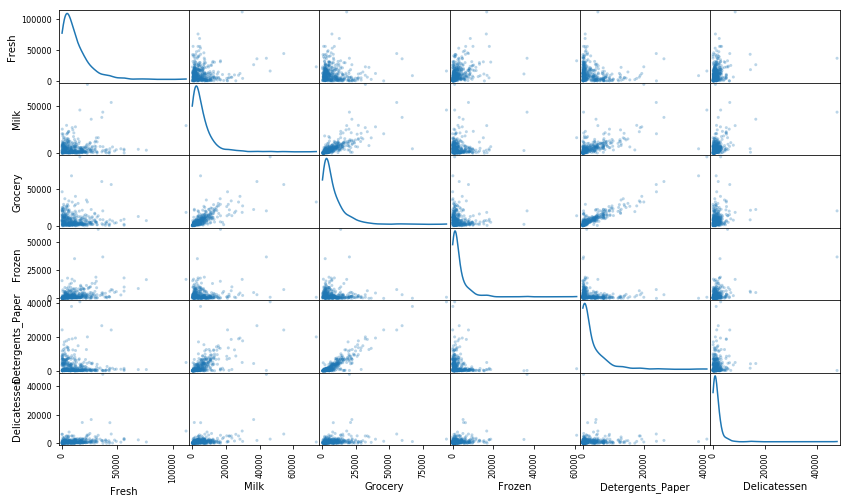

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

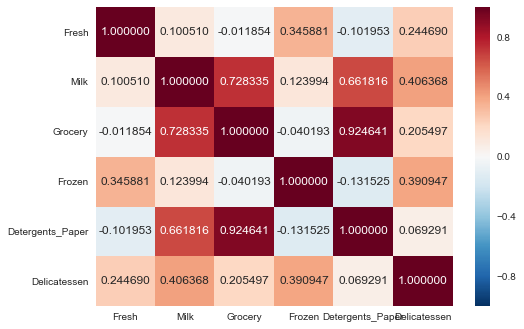

In [6]:
import seaborn as sns

sns.heatmap(data.corr(), annot=True, fmt="f")

In [7]:
# TODO: 看对角线上的核密度估计图(Kernel Density Estimation)

### 问题 3
* 将散布矩阵作为参考，讨论数据集的分布情况，尤其是正态性(高斯分佈)、离群值、大量接近 0 的数据点等。如果你需要区分某些图表，以便进一步阐述你的观点，也可以这么做。
* 有任何特征对存在某种联系吗？
* 能够佐证你尝试预测的特征存在相关性论点吗？
* 这些特征的数据分布情况如何？

**提示：**数据是正态分布的吗？ 大部分数据点都位于哪个位置？你可以使用 [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) 得出特征关系，然后使用 [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)（要提供给热图的数据是联系值。例如 `data.corr()`）可视化这些特征，以进一步获得信息。

<font color="red">
   
  - ”正態性分佈” - 不对称的分布一般就不再称为正态分布了
  - [核密度估计Kernel Density Estimation(KDE)](http://www.dataivy.cn/blog/核密度估计kernel-density-estimation_kde/)
  - [偏态分布](https://zh.wikipedia.org/wiki/偏度)
  - 观察分布, 我们可以看对角线上的核密度估计图(Kernel Density Estimation),可以快速理解为经过平滑处理的直方图.这里数据的分布并不类似正态分布，你可以利用偏态分布 的知识, 进行更准确的观察和描述
    
</font>

<font color="blue">
    
**答案：**

- 正態性分佈，這比較難觀察，因為每個feature的scale差異很大，例如Fresh(12000)跟只有Delicatessen(1524)的平均數字差異將近10倍。導致整個散布矩阵會受到較大的scale的feature影響而集中在格子中左下角區域，也就是大量接近0的區域。

- 從heatmap可以觀察出，只有Delicatessen，Milk跟其他特徵都保有正相關性，可以從Delicatessen，Milk來進行觀察區分不同客戶族群。
    - Milk跟Detergents_paper和Grocery的相關性高。可以推測這樣的組合有可能是咖啡廳之類，需要提供杯子(Grocery)或者紙巾(Detergents_paper)。
    - Delicatessen跟Milk的相關性高，也可以推測出這樣有可能是咖啡廳之類，輕食(火腿，三明治)搭配咖啡。
    
</font>

## 数据预处理
在此部分，你将预处理数据（对数据进行缩放并检测离群值，或许还会删除离群值），以便更好地表示客户数据。预处理数据通常是很关键的步骤，可以确保通过分析获得的结果有显著统计意义。

### 实现：特征缩放
如果数据不是正态分布数据，尤其是如果均值和中值差别很大（表明非常偏斜），通常[比较合适的方法](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics)是应用非线性缩放——尤其是对金融数据来说。实现这种缩放的一种方式是采用[博克斯-卡克斯检定](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，该检定会计算能缩小偏斜情况的最佳次方转换方式。适合大多数情况的更简单方式是采用自然对数。
[特徵縮放](https://yoyoyohamapi.gitbooks.io/mit-ml/content/%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92/articles/%E7%89%B9%E5%BE%81%E7%BC%A9%E6%94%BE.html)

你需要在下面的代码块中实现以下步骤：
 - 通过应用对数缩放将数据副本赋值给 `log_data`。你可以使用 `np.log` 函数完成这一步。
 - 在应用对数缩放后，将样本数据副本赋值给 `log_samples`。同样使用 `np.log`。

/Users/htaiwan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


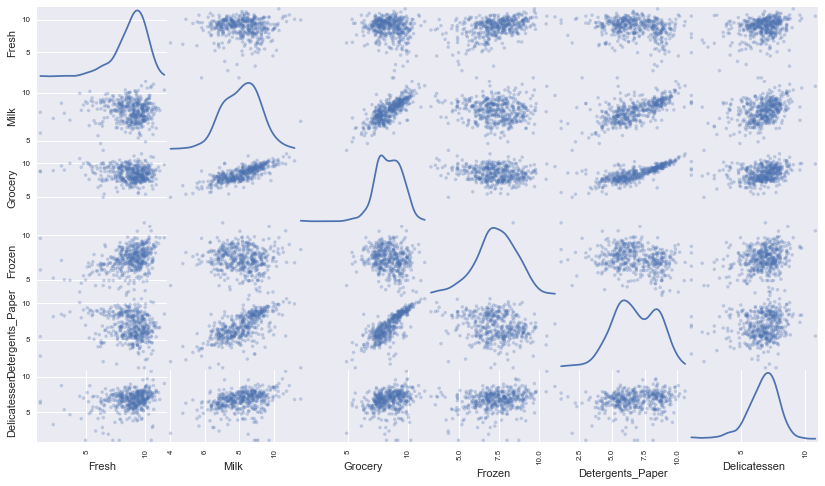

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在对数据应用自然对数缩放后，每个特征的分布应该看起来很正态了。对于你之前可能发现相互有关联的任何特征对，在此部分观察这种联系是否依然存在（是否比之前更明显）。

运行以下代码，看看在应用自然对数后样本数据有何变化。

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### 实现：检测离群值
对于任何分享的数据预处理步骤来说，检测数据中的离群值都极为重要。如果结果考虑了离群值，那么这些离群值通常都会使结果出现偏斜。在判断什么样的数据属于离群值时，可以采用很多“一般规则”。在此项目中，我们将使用 [Tukey 方法检测离群值](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：*离群值步长*等于 1.5 倍四分位距 [IQR](https://baike.baidu.com/item/%E5%9B%9B%E5%88%86%E4%BD%8D%E8%B7%9D)。如果某个数据点的特征超出了该特征的离群值步长范围，则该特征属于异常特征。

你需要在下面的代码块中实现以下步骤：
 - 将给定特征的第 25 百分位值赋值给 `Q1`。 为此，请使用 `np.percentile` [參考](https://blog.csdn.net/NockinOnHeavensDoor/article/details/78765556)。
 - 将给定特征的第 75 百分位值赋值给 `Q3`。同样使用 `np.percentile`。
 - 将给定特征的离群值步长计算结果赋值给 `step`。
 - （可选步骤）通过向 `outliers` 列表添加索引，从数据集中删除某些数据点。

**注意：**如果你选择删除任何离群值，确保样本数据不包含任何此类数据点！  
实现这一步骤后，数据集将存储在变量 `good_data` 中。

In [10]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25, axis = 0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75, axis = 0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    
    step = 1.5 * (Q3 - Q1)
        
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65, 66 , 75, 128, 154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### 问题 4
* 根据上述定义，有任何数据点属于多个特征的离群值吗？
* 应该从数据集中删除这些数据点吗？
* 如果向 `outliers` 列表中添加了任何要移除的数据点，请解释为何这么做。

** 提示：**如果有数据点在多个类别中都属于离群值，思考下为何是这种情况，以及是否确实需要删除。此外注意离群值对 K 均值有何影响，以及这种影响对分析是否删除这些数据起到决定作用。

<font color="red">

- 是要求重复出现的异常值都要找出来
    
</font>

<font color="blue">

**答案：**

- 有，id:65, 66 , 75, 128, 154分別都是某些分類下的共同的離群值。
- 應該要刪除。
- 因為K均值會隨機初始化K個中心點，這些初始化的中心點對離群值是相當敏感。
    - 例如：如果某個初始化的中心剛好在離群值附近，會導致此中心點陷入局部最佳解，無法脫離此離群值。
    
</font>

## 特征转换
在此部分，你将利用主成分分析 (PCA) 得出批发客户数据的基本结构。因为对数据集使用 PCA 会计算哪些维度最适合最大化方差，我们将发现哪些特征组合最能描述客户。

### 实现：PCA

现在数据已经缩放为更正态的分布，并且删除了任何需要删除的离群值，现在可以向 `good_data` 应用 PCA，以发现哪些数据维度最适合最大化所涉及的特征的方差。除了发现这些维度之外，PCA 还将报告每个维度的*可解释方差比*——数据中有多少方差可以仅通过该维度进行解释。注意 PCA 的成分（维度）可以视为空间的新“特征”，但是它是数据中存在的原始特征的成分。

- [Eaplained Variance](http://arbu00.blogspot.com/2017/02/6-principal-component-analysispca.html)

你需要在下面的代码块中实现以下步骤：
 - 导入 `sklearn.decomposition.PCA` 并将对 `good_data` 进行六维度 PCA 转化的结果赋值给 `pca`。
 - 使用 `pca.transform` 对 `log_samples` 应用 PCA 转化，并将结果赋值给 `pca_samples`。

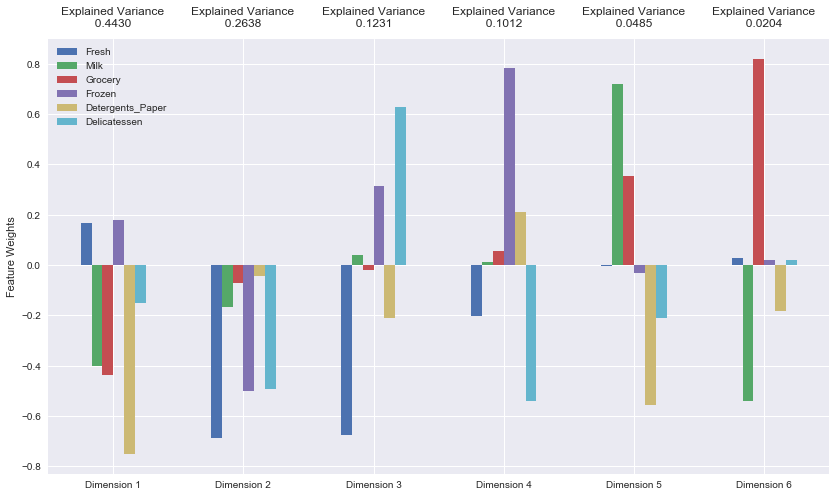

In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### 问题 5

* 由第一个主成分和第二个主成分解释的数据方差* **总量** *是多少？
* 前四个主成分解释的数据方差是多少？
* 使用上面提供的可视化图表描述每个维度和每个维度解释的累积方程，侧重于每个维度最能表示哪些特征（包括能解释的正方差和负方差）。讨论前四个维度最能表示什么样的客户消费规律。

<font color="red">
    
- PCA 将原来的6个特征通过数学变换变成新的6个特征

- 越前面的特征维度中, 数据的分散越明显, 我们关心分散程度是因为我们想更好地区分不同的数据.

- 我们在这些按分散程度来排序的维度中描述数据的话, 就能节省后面分散不明显的维度. 减少计算量
    
- **提示：**特定维度的正增长对应的是*正加权*特征的_增长_以及*负加权*特征的_降低_。增长或降低比例由具体的特征权重决定。

- 例子: 如果一个客户在 Fresh(负加权特征) 上的采购有增长, 那么这个客户在第三个主成分上的值将会较明显地减少, 而如果一个客户在Delicatessen(正加权特征) 上采购有所增长, 那么这个客户在第三个主成分上的值将会明显地增长.
   
</font>

<font color="blue">

**答案：**

- 0.4419 + 0.2723 = 0.7142 (表示前面兩個維度的組合，已經可以解釋71%的客戶購買行為)
- 0.4419 + 0.2723 + 0.1180 + 0.0978 = 0.93  (表示前面四個維度的組合，已經可以解釋93%的客戶購買行為)
- 討論前4個維度
    - Dimension 1:
      在Dimension 1大致上會延這樣的分配 0.15Fresh - 0.4Milk - 0.42Grocery + 0.2Frozen - 0.7Detergent Paper - 0.15Delicatessen.
        - 如果在dimension 1是正值：
            - 有可能Fresh,Frozen的賣出去的量是多的。
            - 或者Milk, Grocery, Detergent Paper賣出去數量是少的。
        - 如果在dimension 1是負值：
            - 有可能Fresh,Frozen的賣出去量的是少的。
            - 或者Milk, Grocery, Detergent Paper賣出去數量是多的。
            
    - Dimension 2:
       因為所有weight都是負值，其中Fresh, Frozen, Delicatessen影響最大。
         - 如果在dimension 2是正值：
            - 標示Milk, Grocery and Detergent的賣出去的數量要很多。
            - 或者Fresh, Frozen and delicatessen賣出去的數量要很少。
         - 如果在dimension 2是負值：
            - 基本上只要都賣得很少，就會滿足了。
 
    - Dimension 3:
         - 如果在dimension 3是正值：
            - 有可能Frozen,delicatessen的賣出去的數量是多的。
            - 或者fresh賣出去的數量是少的。
         - 如果在dimension 3是負值：
            - 剛上面敘述剛好相反。
       
    - Dimension 4:
         - 如果在dimension 4是正值：
            - 有可能 Frozen 的賣出去的數量是多的。
            - 或者delicatessen賣出去的數量是少的。
         - 如果在dimension 4是負值：
             - 剛上面敘述剛好相反。   
</font>


### 观察
运行以下代码，看看经过对数转换的样本数据在六维空间里应用 PCA 转换后有何变化。观察样本数据点的前四个维度的数字值。看看与你一开始对样本数据点的判断是否一致。

In [12]:
display(data.describe())

display(samples)

# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3579,-1.7393,0.2210,0.2840,-0.5939,-0.0148
1,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### 实现：降维
在使用主成分分析时，主要目标之一是降低数据维度，以便降低问题的复杂度。降维有一定的代价：使用的维度越少，则解释的总方差就越少。因此，为了了解有多少个维度对问题来说是必要维度，*累积可解释方差比*显得极为重要。此外，如果大量方差仅通过两个或三个维度进行了解释，则缩减的数据可以之后可视化。

你需要在下面的代码块中实现以下步骤：
 - 将对 `good_data` 进行二维拟合 PCA 转换的结果赋值给 `pca`。
 - 使用 `pca.transform` 对 `good_data` 进行 PCA 转换，并将结果赋值给 `reduced_data`。
 - 使用 `pca.transform` 应用 `log_samples`  PCA 转换，并将结果赋值给 `pca_samples`。

In [13]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码，看看经过对数转换的样本数据在仅使用二个维度并应用 PCA 转换后有何变化。观察前两个维度的值与六维空间里的 PCA 转换相比如何没有变化。


In [14]:
display(data.describe())
display(samples)

# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


,Dimension 1,Dimension 2
0,-2.3579,-1.7393
1,-2.9903,-0.3645
2,-1.2804,-0.9587


## 可视化双标图
双标图是一种散点图，每个数据点由主成分上的分数表示。坐标轴是主成分（在此图中是 `Dimension 1` 和 `Dimension 2`）。此外，双标图显示了原始特征沿着成分的投影情况。双标图可以帮助我们解释降维数据，并发现主成分与原始特征之间的关系。

运行以下代码单元格，以生成降维数据双标图。

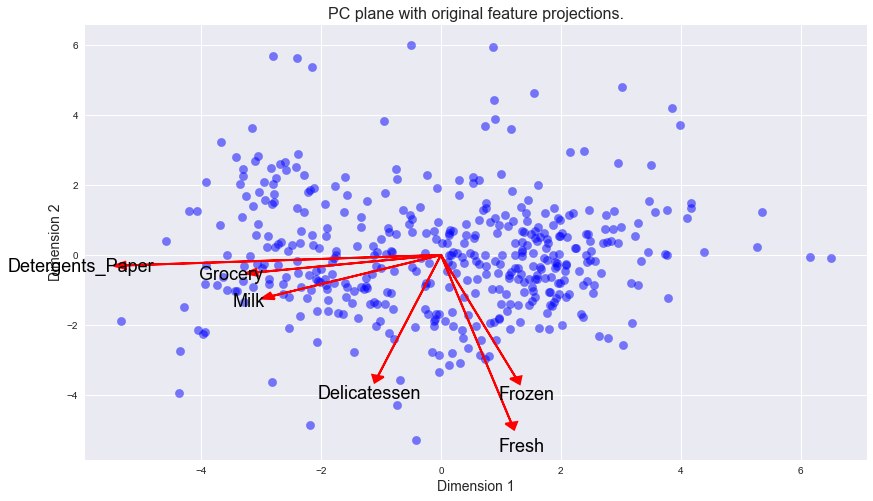

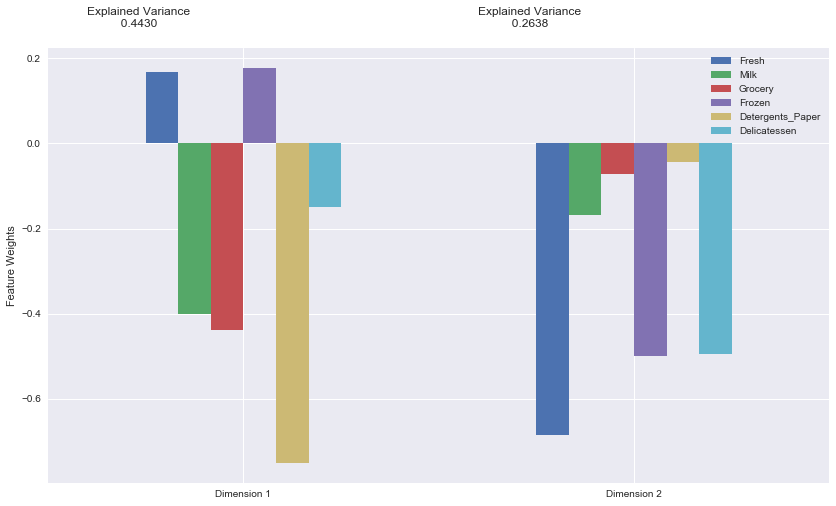

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)
pca_results = vs.pca_results(good_data, pca)

### 观察

获得原始特征投影（红色部分）后，更容易解释每个点在散点图中的相对位置。例如，图中右下角的点更有可能对应于在 `'Milk'`、`'Grocery'` 和 `'Detergents_Paper'` 上花费很多、但是在其他产品类别上花费不多的客户。

根据该双标图，哪些原始特征与第一个成分的关系最紧密？哪些特征与第二个成分的关系最紧密呢？这些观察结果与你之前获得的 pca_results 图表吻合吗？

<font color="red">

- 如何從柱狀圖專化成雙標圖。 
    ex. 以fresh為例，在第一个成分的高度是0到0.18，在第二個成分是0到-0.64。轉換成雙標圖的向量(0, 0) -> (0.18, -0.64)。
         
</font>

<font color="blue">

**答案：**

根据该双标图，哪些原始特征与第一个成分的关系最紧密？

- 跟第一成份關係最密切，表示此原始特徵沿著第一方向進行主要的變化。
- 從雙標圖觀察Milk, Grocery, Detergents_Paper跟第一成份最密切。


哪些特征与第二个成分的关系最紧密呢？

- 跟第二成份關係最密切，表示此原始特徵沿著第二方向進行主要的變化。
- 從雙標圖觀察Delicatessen, Fresh, Frozen跟第二成份最密切。

这些观察结果与你之前获得的 pca_results 图表吻合吗？

- 雙標圖是根據pca_results轉換出來，所以當然符合之前pca_results的分布狀況。
      
</font>


## 聚类

在此部分，你将选择使用 K 均值聚类算法或高斯混合模型聚类算法发现数据中隐藏的各种客户细分。然后，你将通过将数据点重新转换成原始维度和范围，从聚类中还原具体的数据点以了解它们的显著性。

### 问题 6

* 使用 K 均值聚类算法有何优势？
* 使用高斯混合模型聚类算法有何优势？
* 根据你对批发客户数据到目前为止观察到的结果，你将使用这两个算法中的哪个，为何？

** 提示： **思考下硬聚类和软聚类之间的区别，以及哪种聚类适合我们的数据集。

<font color="red">

判断一个聚类算法是否适合问题, 
- 一种方法是看数据的聚集模式 (我们的可视化双标图中的散点图就展示了这种模式), 
- 一种方法是进行尝试, 用一些评价指标来判断优劣, 比如下面提到的轮廓系数, 
- 也可以看我们的需要, 比如说, 我们想知道每个点属于每个聚类的概率的话, 高斯混合模型就和合适

</font>


<font color="blue">

**答案：**

[參考](https://blog.csdn.net/zhuzhupozhuzhuxia/article/details/78080632)

使用 K 均值聚类算法有何优势？

- 定義: 
   - K- means 的结果是每个数据点被 assign 到其中某一个 cluster.
   
- 缺點:
  - k值的选择是用户指定的，不同的k得到的结果会有挺大的不同
  - 对k个初始质心的选择比较敏感，容易陷入局部最小值
  - 存在局限性，如下面这种非球状的数据分布

- 優點:
    - 算法簡單，容易了解，計算速度較快。

使用高斯混合模型聚类算法有何优势？

- 定義: 
   - 每个GMM由K个Gaussian分布组成，每个Gaussian称为一个“Component”，这些Component 线性加成在一起就组成了GMM 的概率密度函数.
   
- 缺點:
  - GMM 每一次迭代的计算量比 K-means 要大许多

- 優點:
    - 軟聚類: GMM 则给出这些数据点被 assign 到每个 cluster 的概率 。幫助我們了解此sample在不同cluster的機率。

根据你对批发客户数据到目前为止观察到的结果，你将使用这两个算法中的哪个，为何？

- 這裡應該改用K-Means計算。
   - 直接透過轮廓系数來計算分數，發現K-Means(0.426)的最高分比GMM高(0.422)

</font>

### 实现：创建聚类
根据具体的问题，你预计从数据中发现的距离数量可能是已知的数量。如果无法根据*先验*判断聚类的数量，则无法保证给定的聚类数量能够以最佳方式细分数据，因为不清楚数据存在什么样的结构（如果有的话）。但是，我们可以根据每个数据点的*轮廓系数*量化聚类的“优势” 。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)会衡量数据点与所分配的聚类之间的相似度，程度用 -1（不相似）到 1（相似）表示。计算*均值*轮廓系数是对给定聚类进评分的简单方法。

你需要在下面的代码块中实现以下步骤：
 - 对 `reduced_data` 应用聚类算法并将结果赋值给 `clusterer`。
 - 使用 `clusterer.predict` 预测 `reduced_data` 中每个数据点的聚类，并将它们赋值给 `preds`。
 - 使用算法的相应属性得出聚类中心，并将它们赋值给 `centers`。
 - 预测 `pca_samples` 中每个样本数据点的聚类，并将它们赋值给 `sample_preds`。
 - 导入 `sklearn.metrics.silhouette_score` 并对照 `preds`计算 `reduced_data` 的轮廓分数。
   - 将轮廓分数赋值给 `score` 并输出结果。

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 利用silhouette score找到最佳的cluster size
num_clusters = np.arange(2,10)
kmeans_results = {}
for size in num_clusters:
    kmeans = KMeans(size).fit(reduced_data)
    preds = kmeans.predict(reduced_data)
    kmeans_results[size] = silhouette_score(reduced_data, preds)

best_size = max(kmeans_results, key=kmeans_results.get)

display(kmeans_results)

{2: 0.4262810154691084,
 3: 0.3974234200078323,
 4: 0.3327470971178821,
 5: 0.34974944804177627,
 6: 0.36345263563806646,
 7: 0.36480120797880017,
 8: 0.36405497488401767,
 9: 0.36179803728857324}

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 利用silhouette score找到最佳的cluster size
num_clusters = np.arange(2,10)
gmm_results = {}
for size in num_clusters:
    gmm = GaussianMixture(n_components = size).fit(reduced_data)
    preds = gmm.predict(reduced_data)
    gmm_results[size] = silhouette_score(reduced_data, preds)

best_size = max(gmm_results, key=gmm_results.get)

display(gmm_results)

{2: 0.4219168464626149,
 3: 0.37553218893793083,
 4: 0.3309686178178297,
 5: 0.22611222137276368,
 6: 0.3414591226734109,
 7: 0.2764701717008472,
 8: 0.2952824202597468,
 9: 0.24689386897637053}

In [18]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(2).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_
    
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print('best score: ', score)

best score:  0.4262810154691084


### 问题 7

* 报告你尝试的多个聚类数量的轮廓分数。
* 在这些数量中，哪个聚类数量的轮廓分数最高？

<font color="blue">

**答案：**

best score:  0.4262810154691084
 
</font>

### 聚类可视化
使用上述评分指标为你的聚类算法选择最佳聚类数量后，现在可以通过执行以下代码块可视化结果了。注意，为了进行实验，你可以随意调整你的聚类算法的聚类数量，以查看各种不同的可视化结果。但是，提供的最终可视化图表应该对应的是最佳聚类数量。

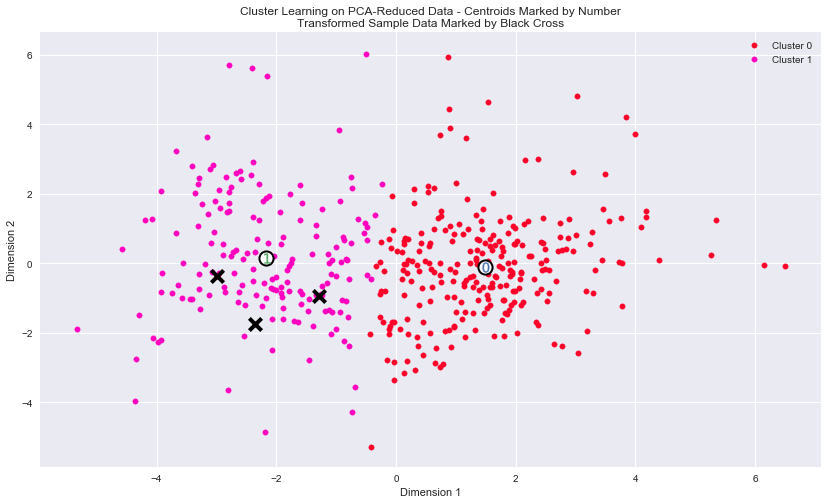

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 实现：数据恢复
上述可视化图表中出现的每个聚类都有一个中心点。这些中心（或均值）并不是来自数据中的特定数据点，而是相应聚类预测的所有数据点的*平均值*。对于创建客户细分这个问题来说，聚类的中心点对应的是*该细分的平均客户数量*。因为数据目前是降维状态并且进行了对数缩放，我们可以通过应用逆转换从这些数据点中还原代表性客户支出。

你需要在下面的代码块中实现以下步骤：
 - 使用 `pca.inverse_transform` 对 `centers` 应用逆转换，并将新的中心点赋值给 `log_centers`。
 - 使用 `np.exp` 对 `log_centers` 应用 `np.log` 的逆函数，并将真正的中心点赋值给 `true_centers`。

In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

display(true_centers - np.round(data.mean()))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0


### 问题 8

* 思考上述代表性数据点的每个产品类别的总购买成本，并参考该项目开头的数据集统计学描述（具体而言，查看各个特征点的均值）。每个客户细分可以表示什么样的场所集合？

**提示：**分配给 `'Cluster X'`  的客户应该与 `'Segment X'` 的特征集表示的场合最一致。思考每个细分表示所选特征点的什么值。参考这些值并通过均值了解它们表示什么样的场合。

<font color="blue">

**答案：**

從segment來觀察，大致將客戶分成兩大類
 - segement 0: 分布在segment0的客戶，採購Milk, Grocery, Detergents_Paper的數量都遠大於整體的平均值。(餐廳)
 - segement 1: 分布在segment1的客戶，採購Milk, Grocery, Detergents_Paper的數量都遠低於整體的平均值。但在Fresh, Frozen需求量是相對大於segement 0，所以表示segment1主要採購的是Fresh, Frozen。(生鮮超市)
 
</font>

### 问题 9

* 对于每个样本点，* **问题 8** *中的哪个客户细分最能代表它？
* 每个样本点的预测与此细分保持一致吗？*

<font color="blue">

**答案：**

- 這是我在問題1的回答，根據樣本的統計數量的推測
    - sample-1: 熟食店
    - sample-2: 咖啡廳
    - sample-3: 市場
    
- 在問題8時，把客戶區分成兩大類，根據sample的特徵，分類算法預測應該如下
    - sample-1: 熟食店(segement 0)
    - sample-2: 咖啡廳(segement 0)
    - sample-3: 市場(segement 1)
   
     
</font>


运行以下代码块，看看每个样本点预测属于哪个聚类。

In [21]:
display(data.describe())

display(samples)

# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


<font color="blue">

**答案：**

sample2跟我的預測結果，似乎不太一樣。

- 雖然sample2購買的fresh的數量很多，但在frozn的採購上並不明顯，所以我當初的預測應該有問題。
   
</font>


## 总结

在最后一部分，你将研究可以对聚类数据采用的方式。首先，你将思考特定的送货方案对不同的客户群（即***客户细分***）有何不同影响。接着，你将思考为每个客户设定标签（该客户属于哪个*细分*）可以如何提供关于客户数据的额外特征。最后，你将比较***客户细分***和数据中的隐藏变量，看看聚类分析是否发现了特定的关系。

### 问题 10
公司在对自己的产品或服务做出小小的改变时，经常会运行 [A/B 测试](https://en.wikipedia.org/wiki/A/B_testing)，判断这项改变对客户有正面还是负面影响。批发商打算将送货服务从目前的一周 5 天改成一周 3 天。但是，批发商仅针对会为其带来正面影响的客户做出这一送货服务变更。 

* 批发商可以如何使用客户细分判断哪些客户（如果有）对送货服务变化保持正面响应。？*

**提示：**可以假设变化会平等地影响到所有客户吗？如何判断对哪些客户群的影响最大？

<font color="blue">

**答案：**

-[A/B 测试](https://www.zhihu.com/question/20045543/answer/13791524)

- A/B test的設計
   - 測試目標: 因為cluster 1的客戶是Fresh為主，改為一週3天送貨，是否會有負面影響。
   - test設計:
       - 針對cluster 1客戶中挑選部分(5%)客戶當作實驗組，將送貨服務改為3天
       - 其於cluster 1的客戶都保持5天，當作觀察組
       - 進行2~3個禮拜的實驗來觀察cluster 1客戶是否會抱怨。
   
</font>

### 问题 11
在使用聚类技巧时，我们从原始无标签数据中得出了额外的结构。因为每个客户都属于某个最合适的***客户细分***（取决于应用的聚类算法），我们可以将*”客户细分“*看作数据的**工程化特征**。假设批发商最近吸引了 10 个新的客户，每个客户都能为每个产品类别带来预期的年收入（估值）。了解这些估值后，批发商希望将每个新客户归类到一个***客户细分***，以确定最合适的送货服务。 
* 批发商如何仅使用估计的产品开支和**客户细分**数据为新客户设定标签？

**提示：**可以使用监督式学习器对原始客户进行训练。目标变量可以是什么？

<font color="blue">

**答案：**
 
- 我們先讓機器根據已有客戶的不同产品类别的收入(X)跟透過聚类技巧對原本已有的客戶生成的標籤(y)，進行監督式學習(學習最佳權重)，完成模型訓練後，再把新客戶的每个产品类别带来预期的年收入(x)丟入模型中，最後在進行softmax分類，給予適當的標籤。
   
</font>

### 可视化底层分布图

在该项目开始时，我们提到我们会从数据集中排除 `'Channel'` 和 `'Region'` 特征，以便在分析过程中侧重于客户产品类别。通过向数据集中重新引入 `'Channel'` 特征，在考虑之前对原始数据集应用的相同 PCA 降维算法时，发现了有趣的结构。

运行以下代码块，看看每个数据点在降维空间里为何标记成 `'HoReCa'`（酒店/餐厅/咖啡厅）或 `'Retail'`。此外，你将发现样本数据点在图中被圈起来了，这样可以标识它们的标签。

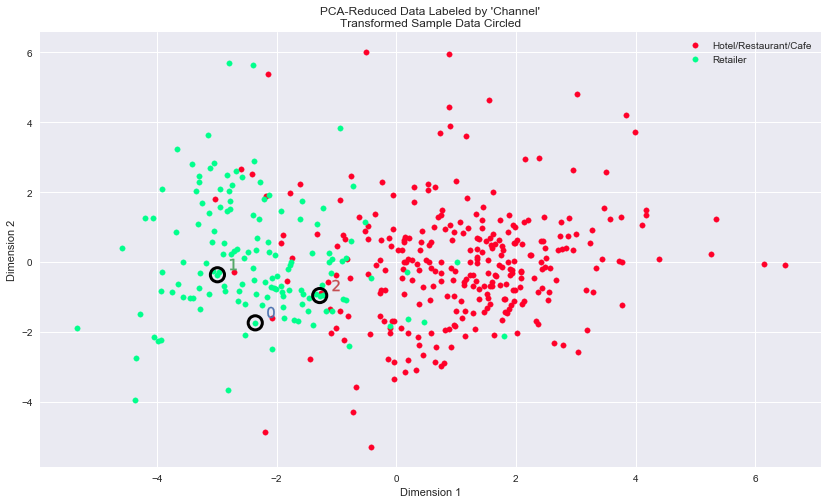

In [22]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

* 你所选的聚类算法和聚类数量与此酒店/餐厅/咖啡厅客户到零售客户底层分布图相比，效果如何？
* 根据此分布图，有任何客户细分可以完全分类为”零售“或”酒店/餐厅/咖啡厅“客户吗？
* 你认为这些分类与之前的客户细分定义保持一致吗？

<font color="blue">

**答案：**
 
- 我覺得整體差異不大，Dimension 1大致都是從-1開始進行切分成左右兩塊。但在Dimension 2大於4和小於-4的地方似乎出現錯誤比例變高。
- 以Dimension 1作為切割，觀察圖的分佈小於-3似乎都可以定義為"零售"，大於3就可以定義”酒店/餐厅/咖啡厅“。
- 我覺得大致上是保持一致，隨然Dimension 1的-3到3之間，兩個cluster有稍微夾雜，也許在多個維度空間就可以將中間夾雜部分在分離出來。
   
</font>

> **注意**：完成所有代码实现部分并成功地回答了上述每个问题后，你可以将该 iPython Notebook 导出为 HTML 文档并获得最终要提交的项目。为此，你可以使用上面的菜单或依次转到
> *文件 -> 下载为 -> HTML (.html)**。在提交时，请同时包含该 notebook 和完成的文档。